# Partie 1


DECOUVRIR  LES  LIBRAIRIES  PANDAS , NETWORKX , FOLIUM.

In [1]:
#Chargement des librairies Pandas, Network et folium
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import csv
import folium


%matplotlib inline

In [2]:
# le fichier transport-nodes.csv
Tn=pd.read_csv('transport-nodes.csv',sep=',',error_bad_lines=None,warn_bad_lines=False)
pd.set_option('mode.chained_assignment', None)
Tn.head(12)

,id,latitude,longitude,population
0,Amsterdam,52.379189,4.899431,821752
1,Utrecht,52.092876,5.104480,334176
2,Den Haag,52.078663,4.288788,514861
3,Immingham,53.612390,-0.222190,9642
4,Doncaster,53.522850,-1.131160,302400
5,Hoek van Holland,51.977500,4.133330,9382
6,Felixstowe,51.963750,1.351100,23689
7,Ipswich,52.059170,1.155450,133384
8,Colchester,51.889210,0.904210,104390
9,London,51.509865,-0.118092,8787892


In [3]:
# le fichier transport-relationships.csv
Tr=pd.read_csv('transport-relationships.csv',sep=',',error_bad_lines=None,warn_bad_lines=False)
pd.set_option('mode.chained_assignment', None)
Tr.head(15)

,src,dst,relationship,cost
0,Amsterdam,Utrecht,EROAD,46
1,Amsterdam,Den Haag,EROAD,59
2,Den Haag,Rotterdam,EROAD,26
3,Amsterdam,Immingham,EROAD,369
4,Immingham,Doncaster,EROAD,74
5,Doncaster,London,EROAD,277
6,Hoek van Holland,Den Haag,EROAD,27
7,Felixstowe,Hoek van Holland,EROAD,207
8,Ipswich,Felixstowe,EROAD,22
9,Colchester,Ipswich,EROAD,32


In [4]:
# Creation d'une listes pour y stocker les noms des villes
ville=[]
i=0
while i<12:
    ville.append((Tn['id'][i]))
    i=i+1

In [5]:
# Creation d'une listes pour y stocker la population de chaque ville 
population=[]
i=0
while i<12:
    population.append((Tn['population'][i])//2000)
    i=i+1

In [6]:
# la liste listEdge nous permet de garder la source et le destination de chaque ville 
listEdge=[]
i=0
while i<15:
        listEdge.append((str(Tr['src'][i]),str(Tr['dst'][i])))
        i=i+1

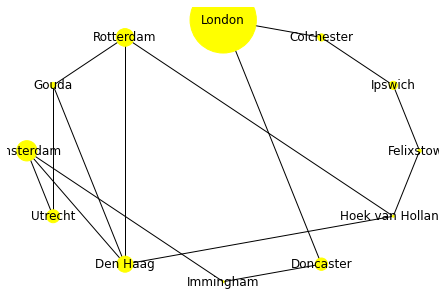

In [7]:
g=nx.Graph()
i=0
while i<12:
        g.add_node((Tn['id'][i]))
        i=i+1
g.add_edges_from(listEdge)
nx.draw_shell(g,with_labels=True,node_size=population,node_color='yellow')



In [8]:
dict(g.nodes.data())

{'Amsterdam': {},
 'Utrecht': {},
 'Den Haag': {},
 'Immingham': {},
 'Doncaster': {},
 'Hoek van Holland': {},
 'Felixstowe': {},
 'Ipswich': {},
 'Colchester': {},
 'London': {},
 'Rotterdam': {},
 'Gouda': {}}

In [9]:
 ajout={}
def ajouterAttribut(mygraph,dfnode,name,Index): 
    i=0
    while i<12:
        ajout[(dfnode[Index][i])]=({name:dfnode[name][i]})
      
        i=i+1
    nx.set_node_attributes(mygraph,ajout)


In [10]:
ajouterAttribut(g,Tn,'population','id')
ajouterAttribut(g,Tn,'latitude','id')
ajouterAttribut(g,Tn,'longitude','id')



In [11]:
dict(g.nodes.data())


{'Amsterdam': {'population': 821752,
  'latitude': 52.379189,
  'longitude': 4.899431},
 'Utrecht': {'population': 334176,
  'latitude': 52.092876,
  'longitude': 5.10448},
 'Den Haag': {'population': 514861,
  'latitude': 52.078663,
  'longitude': 4.288788},
 'Immingham': {'population': 9642,
  'latitude': 53.61239,
  'longitude': -0.22219},
 'Doncaster': {'population': 302400,
  'latitude': 53.52285,
  'longitude': -1.13116},
 'Hoek van Holland': {'population': 9382,
  'latitude': 51.9775,
  'longitude': 4.13333},
 'Felixstowe': {'population': 23689,
  'latitude': 51.96375,
  'longitude': 1.3511},
 'Ipswich': {'population': 133384, 'latitude': 52.05917, 'longitude': 1.15545},
 'Colchester': {'population': 104390,
  'latitude': 51.88921,
  'longitude': 0.90421},
 'London': {'population': 8787892,
  'latitude': 51.509865,
  'longitude': -0.118092},
 'Rotterdam': {'population': 623652,
  'latitude': 51.9225,
  'longitude': 4.47917},
 'Gouda': {'population': 70939, 'latitude': 52.01667, 

In [12]:
for i in g.nodes:
        basemap = folium.Map(location=[g.nodes[i]['latitude'],g.nodes[i]['longitude']],tiles="Stamen Toner",
        width="%100",height="%100",zoom_start=5)

In [13]:
basemap

In [14]:
#Ajouter des marqueurs pour tous les noeuds du reseau avec folium.Marker
def marker(g):
    for i in g.nodes:

         folium.Marker([g.nodes[i]['latitude'],g.nodes[i]['longitude']],zoom_start=5).add_to(basemap)
    return basemap  

    

In [15]:
marker(g)

In [16]:
def construirePointsImage(g):
    points=[]
    for i in g.nodes:
        for neighbor in g.neighbors(i):
            points.append([[g.nodes[i]['latitude'],g.nodes[i]['longitude']],[g.nodes[neighbor]['latitude'],g.nodes[neighbor]['longitude']]])
                 
    return points
    

In [17]:
coordonneesvoisins=construirePointsImage(g)
print(coordonneesvoisins)


[[[52.379189, 4.899431], [52.092876, 5.10448]], [[52.379189, 4.899431], [52.078663, 4.288788]], [[52.379189, 4.899431], [53.61239, -0.22219]], [[52.092876, 5.10448], [52.379189, 4.899431]], [[52.092876, 5.10448], [52.01667, 4.70833]], [[52.078663, 4.288788], [52.379189, 4.899431]], [[52.078663, 4.288788], [51.9225, 4.47917]], [[52.078663, 4.288788], [51.9775, 4.13333]], [[52.078663, 4.288788], [52.01667, 4.70833]], [[53.61239, -0.22219], [52.379189, 4.899431]], [[53.61239, -0.22219], [53.52285, -1.13116]], [[53.52285, -1.13116], [53.61239, -0.22219]], [[53.52285, -1.13116], [51.509865, -0.118092]], [[51.9775, 4.13333], [52.078663, 4.288788]], [[51.9775, 4.13333], [51.96375, 1.3511]], [[51.9775, 4.13333], [51.9225, 4.47917]], [[51.96375, 1.3511], [51.9775, 4.13333]], [[51.96375, 1.3511], [52.05917, 1.15545]], [[52.05917, 1.15545], [51.96375, 1.3511]], [[52.05917, 1.15545], [51.88921, 0.90421]], [[51.88921, 0.90421], [52.05917, 1.15545]], [[51.88921, 0.90421], [51.509865, -0.118092]], [[

In [18]:
def visualiserFolium(g, points, locationpardefaut = [52.3791890, 4.899431], tiles='Stamen Toner', explored = None ):
    basemape = folium.vector_layers.PolyLine(points, color='yellow', weight=3).add_to(basemap)
    return basemape

In [19]:
visualiserFolium(g, coordonneesvoisins )
basemap

# PARTIE 2

In [20]:
class Noeud:
    
    def __init__(self,name):
        self.name = name
        self.attributs = {}
        self.listeNomVoisin = []
        
    def setAttribut(self,key,values):
        self.attributs[key]=values
        
    def getAttribut(self,key):
        return self.attributs[key] 

    def getName(self):
        return self.name
     
    def egal(self, noeud):
        if self.name == noeud.getName():
            return true
        return false

    def getCoutMin(self):
        pass

    def getCout(self,noeud):
        pass





In [21]:
class Graphe:
    def __init__(self):
        self.noeuds = []
        self.arcs = {}
       
  
    def creerNoeuds(self,fichiernoeuds):
        tmp=[]
        with open(fichiernoeuds,'r') as file:
            readAll=csv.DictReader(file)
            for i in readAll:
                newNoeud=Noeud(i['id'])
                newNoeud.setAttribut('latitude',i['latitude'])
                newNoeud.setAttribut('longitude',i['longitude'])
                newNoeud.setAttribut('population',i['population'])
                self.noeuds.append(newNoeud)
                self.arcs[newNoeud.getName()]=[]
            for i in self.noeuds:
                tmp.append(i.getName())
        return tmp
   
    def creerArc(self,fichierarcs):
        arcs=[]
        dic={}
        with open(fichierarcs, 'r') as file:
            readAll=csv.DictReader(file)
            for i in readAll:
                dic['src']= i['src']
                dic['dst']= i['dst']
                dic['relationship'] = i['relationship']
                dic['cost'] = i['cost']
                tmp=dic.copy()
                arcs+=[tmp]
                for x in self.noeuds :
                    if x.getName()== i['src']:
                        tuple=(i['dst'],i['cost'])
                        x.listeNomVoisin.append(tuple)
            for i,j in self.arcs.items():
                for n in arcs:
                    if i==n['src']:
                        j.append(n['dst'])
            
        return arcs
    
    def getNoeud(self,name):
        for get in self.noeuds:
            if get.getName()==name:
                return get
        return 'Introuvable'
    
    def getVoisins(self, noeud):
        Voisins=noeud.listeNomVoisin.copy()
        mesVoisins=[]
        for get in Voisins:
            mesVoisins+=[self.getNoeud(get[0])]
        return mesVoisins
    
    def getCoordonnesVoisins(self,noeud):
        noeudVoisins=self.getVoisins(noeud)
        listCoordonnes=[]
        for i in noeudVoisins:
            tmp=(float(i.getAttribut('latitude')),float(i.getAttribut('longitude')))
            listCoordonnes+=[tmp]
            
        return listCoordonnes
    
    def getListeCoordonnees(self,listeNoeud):
        all=[]
        for i in listeNoeud:
            getNoeudCoord=(float(self.getNoeud(i).getAttribut('latitude')),float(self.getNoeud(i).getAttribut('longitude')))
            all.append(getNoeudCoord)
        return all
    
    def visualiserFolium(self):
        table=[]
        m = folium.Map(location=[52.3791890, 4.899431],tiles='Stamen Toner',explored=None)
        tooltip = "Clicker!"
        for i in self.noeuds:
            folium.Marker([i.getAttribut('latitude'),i.getAttribut('longitude')], popup=i.getName(), tooltip=tooltip,color="#3186cc").add_to(m)
        return m
            

In [22]:
G = Graphe()
G.creerNoeuds('transport-nodes.csv')

['Amsterdam',
 'Utrecht',
 'Den Haag',
 'Immingham',
 'Doncaster',
 'Hoek van Holland',
 'Felixstowe',
 'Ipswich',
 'Colchester',
 'London',
 'Rotterdam',
 'Gouda']

In [23]:
G=Graphe()
G.creerArc('transport-relationships.csv')

[{'src': 'Amsterdam', 'dst': 'Utrecht', 'relationship': 'EROAD', 'cost': '46'},
 {'src': 'Amsterdam',
  'dst': 'Den Haag',
  'relationship': 'EROAD',
  'cost': '59'},
 {'src': 'Den Haag',
  'dst': 'Rotterdam',
  'relationship': 'EROAD',
  'cost': '26'},
 {'src': 'Amsterdam',
  'dst': 'Immingham',
  'relationship': 'EROAD',
  'cost': '369'},
 {'src': 'Immingham',
  'dst': 'Doncaster',
  'relationship': 'EROAD',
  'cost': '74'},
 {'src': 'Doncaster', 'dst': 'London', 'relationship': 'EROAD', 'cost': '277'},
 {'src': 'Hoek van Holland',
  'dst': 'Den Haag',
  'relationship': 'EROAD',
  'cost': '27'},
 {'src': 'Felixstowe',
  'dst': 'Hoek van Holland',
  'relationship': 'EROAD',
  'cost': '207'},
 {'src': 'Ipswich',
  'dst': 'Felixstowe',
  'relationship': 'EROAD',
  'cost': '22'},
 {'src': 'Colchester',
  'dst': 'Ipswich',
  'relationship': 'EROAD',
  'cost': '32'},
 {'src': 'London',
  'dst': 'Colchester',
  'relationship': 'EROAD',
  'cost': '106'},
 {'src': 'Gouda', 'dst': 'Rotterdam',

In [24]:
G.visualiserFolium()

# PARTIE 3

In [25]:
class Pile():
    def __init__(self):
        self.elements = []
    
    def push(self,noeud):
        self.elements.append(noeud)
        
    def contains_noeud(self, name):
        search = name in self.elements
        print(search)
        
    def empty(self):
        if (self.elements == []):
            print("true")
            
    def remove(self):
        if(self.elements == []):
            print("La Pile est vide")
        else:
            del self.elements[len(self.elements)-1]
            

In [26]:
p=Pile()
p.push("Mamadou")
p.push("Mansour")
p.push("Dame")
p.push("Khady")
print(p.elements)
p.remove()
print(p.elements)

['Mamadou', 'Mansour', 'Dame', 'Khady']
['Mamadou', 'Mansour', 'Dame']


In [27]:
class File():
    
    def __init__(self):
        super().__init__()
        
    def remove(self):
        if(self.elements == []):
            print("La file est vide")
        else:
            del self.elements[0]
        

In [28]:
f=Pile()
f.push("Mamadou")
f.push("Mansour")
f.push("Dame")
f.push("Khady")
print(f.elements)
f.remove()
print(f.elements)

['Mamadou', 'Mansour', 'Dame', 'Khady']
['Mamadou', 'Mansour', 'Dame']


# PARTIE 4

In [32]:

visiter = [] 
frontiere = []     

def bfs(visiter, graphe, noeud):
    visiter.append(noeud)
    frontiere.append(noeud)
    while frontiere:
        s = frontiere.pop(0) 
        print (s) 
        for i in graphe[s]:
            if i not in visiter:
                visiter.append(i)
                frontiere.append(i)


In [33]:
def dfs(graphe,noeud,visiter=[]):
    visiter +=[noeud]
    for i in graphe[noeud]:
        if i not in visiter:
            visiter=dfs(graphe,i,visiter)        
    return visiter